<a href="https://colab.research.google.com/github/richardkilea/Learning/blob/main/soccer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [148]:
df = pd.read_csv('/content/EPL_Soccer_MLR_LR.csv')
df

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,"Ryan, Mr. Patrick",LIV,4.90,7.6,45.6,16.0,90,27.56,67.2,82.00,183.9,93.2,11.79
198,"Saad, Mr. Amin",LIV,5.66,8.3,50.2,17.7,38,23.76,56.5,72.00,183.5,80.0,10.05
199,"Saad, Mr. Khalil",LIV,5.03,6.4,42.7,14.3,122,22.01,47.6,68.00,183.1,73.8,8.51
200,"Saade, Mr. Jean Nassr",LIV,4.97,8.8,43.0,14.9,233,22.34,60.4,63.00,178.4,71.1,11.50


In [149]:
df.shape

(202, 13)

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [151]:
df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [152]:
df.isna().sum()

PlayerName                0
Club                      0
DistanceCovered(InKms)    0
Goals                     0
MinutestoGoalRatio        0
ShotsPerGame              0
AgentCharges              0
BMI                       0
Cost                      0
PreviousClubCost          0
Height                    0
Weight                    0
Score                     0
dtype: int64

In [153]:
df.nunique()

PlayerName                198
Club                        3
DistanceCovered(InKms)    114
Goals                      71
MinutestoGoalRatio        105
ShotsPerGame               55
AgentCharges              111
BMI                       180
Cost                      176
PreviousClubCost          135
Height                    147
Weight                    164
Score                     180
dtype: int64

In [154]:
df.corr()

<ipython-input-154-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


In [155]:
df['Score'].value_counts()

9.56     3
8.51     3
8.84     2
9.20     2
8.97     2
        ..
11.85    1
13.35    1
11.77    1
20.10    1
6.26     1
Name: Score, Length: 180, dtype: int64

In [156]:
df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


Text(0.5, 1.0, 'Scatter plot between Cost and Score')

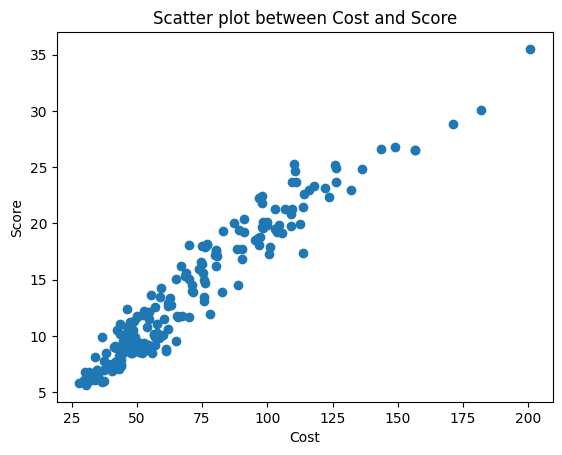

In [157]:
#Let's plot cost vs. score

#figure(figsize=(8, 6), dpi=80)
plt.scatter(df['Cost'], df['Score'])

# label

plt.xlabel("Cost")
plt.ylabel("Score")
plt.title("Scatter plot between Cost and Score")

In [158]:
df.Goals.value_counts()

6.4     11
6.6      9
5.8      8
7.5      8
7.6      7
        ..
10.6     1
9.7      1
13.3     1
3.3      1
8.8      1
Name: Goals, Length: 71, dtype: int64

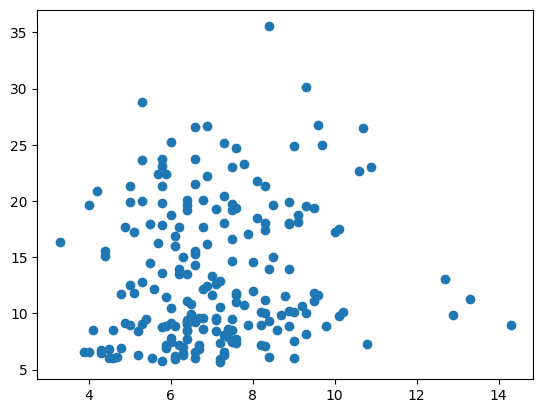

In [159]:
fig, ax = plt.subplots()
ax.scatter(df["Goals"][:1000], df["Score"][:1000])

<Axes: ylabel='Frequency'>

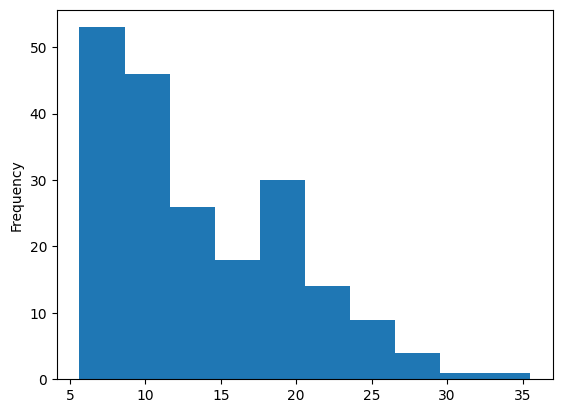

In [160]:
df.Score.plot.hist()

In [161]:
df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


In [162]:
df.drop('PlayerName', axis=1, inplace=True)

In [163]:
df.head()

,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


In [164]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Club"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[  0.  ,   0.  ,   1.  , ...,  63.32, 195.9 ,  78.9 ],
       [  0.  ,   0.  ,   1.  , ...,  58.55, 189.7 ,  74.4 ],
       [  0.  ,   0.  ,   1.  , ...,  55.36, 177.8 ,  69.1 ],
       ...,
       [  0.  ,   1.  ,   0.  , ...,  68.  , 183.1 ,  73.8 ],
       [  0.  ,   1.  ,   0.  , ...,  63.  , 178.4 ,  71.1 ],
       [  0.  ,   1.  ,   0.  , ...,  72.  , 190.8 ,  76.7 ]])

In [165]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,1.0,3.96,7.5,37.5,12.3,60.0,20.56,109.1,63.32,195.9,78.9
1,0.0,0.0,1.0,4.41,8.3,38.2,12.7,68.0,20.67,102.8,58.55,189.7,74.4
2,0.0,0.0,1.0,4.14,5.0,36.4,11.6,21.0,21.86,104.6,55.36,177.8,69.1
3,0.0,0.0,1.0,4.11,5.3,37.3,12.6,69.0,21.88,126.4,57.18,185.0,74.9
4,0.0,0.0,1.0,4.45,6.8,41.5,14.0,29.0,18.96,80.3,53.20,184.6,64.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.0,1.0,0.0,4.90,7.6,45.6,16.0,90.0,27.56,67.2,82.00,183.9,93.2
198,0.0,1.0,0.0,5.66,8.3,50.2,17.7,38.0,23.76,56.5,72.00,183.5,80.0
199,0.0,1.0,0.0,5.03,6.4,42.7,14.3,122.0,22.01,47.6,68.00,183.1,73.8
200,0.0,1.0,0.0,4.97,8.8,43.0,14.9,233.0,22.34,60.4,63.00,178.4,71.1


In [166]:
# Let's refit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [167]:
model.score(X_test, y_test)

0.9290050578148572

In [168]:
model.predict(X_test)

array([ 8.2799, 19.7875, 20.556 ,  9.7501, 13.9629, 10.0496, 20.9625,
        9.735 , 19.546 , 23.2139, 12.5769,  6.2936,  6.2297, 16.4404,
       13.8153, 11.2947, 15.839 ,  6.3445, 12.9067, 11.3549,  9.3189,
       23.5457, 18.6979, 10.9209, 11.7384, 18.8253, 10.8001, 11.1893,
        7.5393,  6.3676, 13.3367, 19.6031, 27.0977,  7.3872,  7.1441,
        7.2999, 10.7573,  9.4255,  8.877 ,  8.7858,  7.1312])

In [169]:
y_test.mean()

13.111707317073172

In [170]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [171]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [172]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

In [173]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.9401268292682925

In [174]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
95,8.45,8.2799,-0.1701
15,19.83,19.7875,-0.0425
30,20.12,20.5560,0.4360
159,8.51,9.7501,1.2401
186,13.06,13.9629,0.9029
115,9.03,10.0496,1.0196
69,21.30,20.9625,-0.3375
172,8.84,9.7350,0.8950
161,19.94,19.5460,-0.3940
45,22.62,23.2139,0.5939


In [175]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

2.727763825365848

In [176]:
# Calculate MSE by hand
squared = np.square(df["differences"])
squared.mean()

2.727763825365848

In [177]:
from sklearn.model_selection import cross_val_score

In [178]:
np.random.seed(42)
cv_r2 = cross_val_score(model, transformed_X, y, cv=5, scoring=None)
np.mean(cv_r2)

0.8013756516264744

In [179]:
cv_r2

array([0.57538943, 0.87264644, 0.91759126, 0.74930924, 0.89194189])

In [180]:
# Mean squared error
cv_mse = cross_val_score(model, transformed_X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-3.0235154361987826

In [181]:
# Mean absolute error
cv_mae = cross_val_score(model, transformed_X, y, cv=5, scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-1.156457414634146

In [182]:
# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.9290050578148572
MAE: 0.9401268292682925
MSE: 2.727763825365848


In [183]:
import pickle

# Save to file in the current working directory
pkl_filename = "Soccer_predictions_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model, file)

In [184]:
with open('Soccer_predictions_model.pkl', 'rb') as file:
     loaded_model = pickle.load(file)

In [185]:
result = loaded_model.predict(X_test)